In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_parquet('./data/sillok_finetune.parquet', engine='pyarrow')
df1.head()

,king,king_order,year,relative_year,month,entry_order,original_text,translated_text
0,태조,1,NaN,NaN,총서,1.0,"太祖康獻至仁啓運聖文神武大王, 姓李氏, 諱旦, 字君晋, 古諱成桂, 號松軒, 全州大姓也...",태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏...
1,태조,1,NaN,NaN,총서,2.0,"○明年乙卯, 散吉聞于元帝, 元爲立斡東千戶所, 給降金牌, 爲南京等處五千戶所, 首千戶、...","명년 을묘(1255)에 산길이 이 사실을 원(元)나라 황제에게 알리니, 원나라에서 ..."
2,태조,1,NaN,NaN,총서,3.0,"○斡東東南三十餘里, 有海島曰者考羅, 北連於陸。 穆祖築石城, 以放牛馬。","알동의 동남쪽 30여 리에 해도(海島)가 있는데, 자고라(者考羅)라고 한다. 북쪽으..."
3,태조,1,NaN,NaN,총서,4.0,"○憲宗八年, 受散吉令旨, 管領李春、文大純、趙奧、魯哥兒、卓靑、尙哉、光奕、張哥等八介百戶...","〈원나라〉 헌종(憲宗) 8년(1258)에 산길(散吉)의 영지(令旨)를 받아, 이춘(..."
4,태조,1,NaN,NaN,총서,5.0,"○世祖皇帝 中統二年辛酉六月, 尙書省給降本所行使銅印。",세조 황제(世祖皇帝) 중통(中統) 2년(1261) 신유 6월에 상서성(尙書省)에서 ...


In [3]:
df1['year'].value_counts()

year
1618.0    5235
1612.0    4061
1613.0    3720
1616.0    3440
1617.0    3260
          ... 
1607.0      54
1586.0      47
1571.0      43
1582.0      37
1928.0       7
Name: count, Length: 372, dtype: int64

In [4]:
df1['relative_year'].unique().astype(int)

/var/folders/l4/xcb152_d5v51k4kx19t42f0w0000gn/T/ipykernel_79324/1582849484.py:1: RuntimeWarning: invalid value encountered in cast
  df1['relative_year'].unique().astype(int)


array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18, 1418,   19,   20,
         21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32, 1450, 1468, 1469,   33,   34,   35,   36,   37,   38,   39,
       1545, 1567,   40,   41, 1608, 1649, 1659, 1674,   42,   43,   44,
         45,   46, 1720, 1863, 1907])

In [5]:
df1['month'].unique()

array(['총서', '7월', '8월', '9월', '10월', '11월', '12월', '윤12월', '1월', '2월',
       '3월', '4월', '5월', '6월', '윤9월', '윤5월', '윤3월', '윤11월', '윤7월', '윤4월',
       '윤1월', '윤8월', '윤6월', '윤2월', '윤10월'], dtype=object)

In [6]:
len(df1)

308554

In [7]:
df1['original_text'].sample(1).iloc[0]

'○司憲府啓尹英賢、朴燁事。 【정족산사고본】 24책 106권 11장 A면【국편영인본】 광해군일기32책 506면 【분류】정론-간쟁(諫諍) / 인사-임면(任免) / 사법-탄핵(彈劾)'

In [8]:
df1['original_text'].str.len().describe()

count    308554.000000
mean        215.600537
std        1404.764642
min           2.000000
25%          22.000000
50%          73.000000
75%         200.000000
max      361261.000000
Name: original_text, dtype: float64

In [9]:
df1['translated_text'].str.len().describe().astype(int)

count     308554
mean         516
std         3006
min            0
25%           52
50%          170
75%          510
max      1232042
Name: translated_text, dtype: int64

In [10]:
(df1['original_text'].str.len() > 5000).mean()

0.0016625939057668998

In [11]:
((df1['translated_text'].str.len() > 1000) & (df1['translated_text'].str.len() < 6000)).mean()

0.11937618698833916

따라서 `translated_text`의 길이가 1000보다 높으면서,6000보다 작은 샘플들 중에서 70%, 1000보다 작은 샘플들에서 30%를 추출하여 test set을 구성함.

In [12]:
np.corrcoef(df1['original_text'].str.len(), df1['translated_text'].str.len())

array([[1.        , 0.54443249],
       [0.54443249, 1.        ]])

In [13]:
df1[df1['original_text'].str.len() < 1000]['translated_text'].str.len().describe()

count    298465.000000
mean        357.075912
std         500.687014
min           0.000000
25%          50.000000
50%         159.000000
75%         454.000000
max       14683.000000
Name: translated_text, dtype: float64

In [14]:
df1[df1['original_text'].str.len() < 500]['translated_text'].str.len().describe()

count    280374.000000
mean        268.493751
std         325.297855
min           0.000000
25%          46.000000
50%         139.000000
75%         373.000000
max       10633.000000
Name: translated_text, dtype: float64

In [15]:
df1['translated_text'].str.len().describe().astype(int)

count     308554
mean         516
std         3006
min            0
25%           52
50%          170
75%          510
max      1232042
Name: translated_text, dtype: int64

<Axes: >

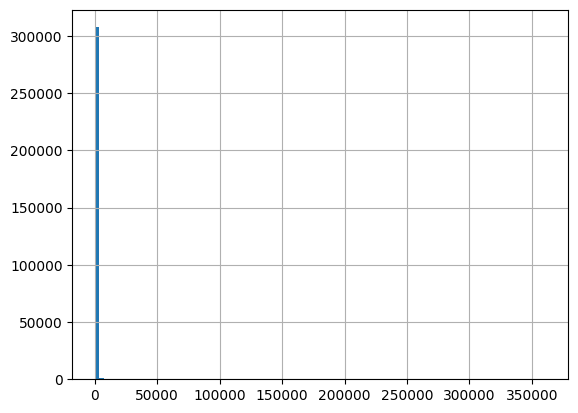

In [16]:
df1['original_text'].str.len().hist(bins=100)

<Axes: >

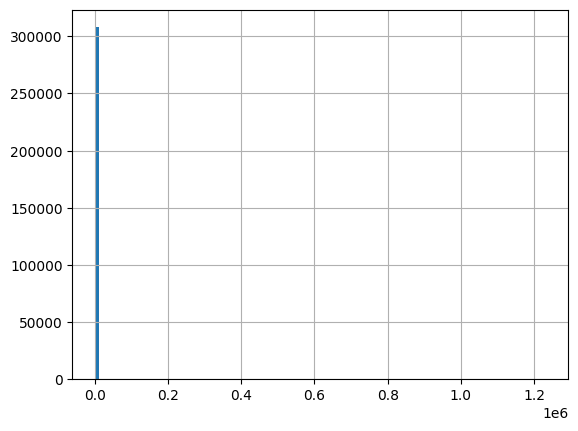

In [17]:
df1['translated_text'].str.len().hist(bins=100)

## Train / Test Set Hold

In [18]:
df1 = df1[df1['translated_text'].str.len() < 6000]
df1.head()

,king,king_order,year,relative_year,month,entry_order,original_text,translated_text
0,태조,1,NaN,NaN,총서,1.0,"太祖康獻至仁啓運聖文神武大王, 姓李氏, 諱旦, 字君晋, 古諱成桂, 號松軒, 全州大姓也...",태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏...
1,태조,1,NaN,NaN,총서,2.0,"○明年乙卯, 散吉聞于元帝, 元爲立斡東千戶所, 給降金牌, 爲南京等處五千戶所, 首千戶、...","명년 을묘(1255)에 산길이 이 사실을 원(元)나라 황제에게 알리니, 원나라에서 ..."
2,태조,1,NaN,NaN,총서,3.0,"○斡東東南三十餘里, 有海島曰者考羅, 北連於陸。 穆祖築石城, 以放牛馬。","알동의 동남쪽 30여 리에 해도(海島)가 있는데, 자고라(者考羅)라고 한다. 북쪽으..."
3,태조,1,NaN,NaN,총서,4.0,"○憲宗八年, 受散吉令旨, 管領李春、文大純、趙奧、魯哥兒、卓靑、尙哉、光奕、張哥等八介百戶...","〈원나라〉 헌종(憲宗) 8년(1258)에 산길(散吉)의 영지(令旨)를 받아, 이춘(..."
4,태조,1,NaN,NaN,총서,5.0,"○世祖皇帝 中統二年辛酉六月, 尙書省給降本所行使銅印。",세조 황제(世祖皇帝) 중통(中統) 2년(1261) 신유 6월에 상서성(尙書省)에서 ...


In [19]:
df1[['original_text', 'translated_text']]

,original_text,translated_text
0,"太祖康獻至仁啓運聖文神武大王, 姓李氏, 諱旦, 字君晋, 古諱成桂, 號松軒, 全州大姓也...",태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏...
1,"○明年乙卯, 散吉聞于元帝, 元爲立斡東千戶所, 給降金牌, 爲南京等處五千戶所, 首千戶、...","명년 을묘(1255)에 산길이 이 사실을 원(元)나라 황제에게 알리니, 원나라에서 ..."
2,"○斡東東南三十餘里, 有海島曰者考羅, 北連於陸。 穆祖築石城, 以放牛馬。","알동의 동남쪽 30여 리에 해도(海島)가 있는데, 자고라(者考羅)라고 한다. 북쪽으..."
3,"○憲宗八年, 受散吉令旨, 管領李春、文大純、趙奧、魯哥兒、卓靑、尙哉、光奕、張哥等八介百戶...","〈원나라〉 헌종(憲宗) 8년(1258)에 산길(散吉)의 영지(令旨)를 받아, 이춘(..."
4,"○世祖皇帝 中統二年辛酉六月, 尙書省給降本所行使銅印。",세조 황제(世祖皇帝) 중통(中統) 2년(1261) 신유 6월에 상서성(尙書省)에서 ...
...,...,...
308549,"三日。 申時, 裕陵啓欑宮。 仍行別奠。",신시(申時)에 유릉(裕陵)에서 찬궁(欑宮)을 열고 별전(別奠)을 행하였다.
308550,命金昇圭殯殿主監提擧差下。,김승규(金昇圭)를 빈전 주감 제거(殯殿主監提擧)에 차하(差下)하라고 명하였다.
308551,六日。 【陰曆戊辰五月十九日】 祔純宗于太廟。 純明孝皇后同祔。 御眞奉安于璿源殿。 【純宗...,【음력 무진(戊辰) 5월 19일】 태묘(太廟)에 순종(純宗)의 신주(神主)를 모시고...
308552,六日。 【陰曆戊辰五月十九日】 祔純宗于太廟。 純明孝皇后同祔。 御眞奉安于璿源殿。 【純宗...,【음력 무진(戊辰) 5월 19일】 태묘(太廟)에 순종(純宗)의 신주(神主)를 모시고...


In [20]:
f'Train Set Size : {int(len(df1) * 0.9)}, Test Set Size : {int(len(df1) * 0.1)}'

'Train Set Size : 275965, Test Set Size : 30662'

In [21]:
f'Train Set Size : {int(len(df1) * 0.9)}, Test Set Size : {int(len(df1) * 0.1)}'

'Train Set Size : 275965, Test Set Size : 30662'

In [22]:
group_factor = 7
df1['entry_order_grouped'] = df1['entry_order'] // group_factor
df1.head()

,king,king_order,year,relative_year,month,entry_order,original_text,translated_text,entry_order_grouped
0,태조,1,NaN,NaN,총서,1.0,"太祖康獻至仁啓運聖文神武大王, 姓李氏, 諱旦, 字君晋, 古諱成桂, 號松軒, 全州大姓也...",태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏...,0.0
1,태조,1,NaN,NaN,총서,2.0,"○明年乙卯, 散吉聞于元帝, 元爲立斡東千戶所, 給降金牌, 爲南京等處五千戶所, 首千戶、...","명년 을묘(1255)에 산길이 이 사실을 원(元)나라 황제에게 알리니, 원나라에서 ...",0.0
2,태조,1,NaN,NaN,총서,3.0,"○斡東東南三十餘里, 有海島曰者考羅, 北連於陸。 穆祖築石城, 以放牛馬。","알동의 동남쪽 30여 리에 해도(海島)가 있는데, 자고라(者考羅)라고 한다. 북쪽으...",0.0
3,태조,1,NaN,NaN,총서,4.0,"○憲宗八年, 受散吉令旨, 管領李春、文大純、趙奧、魯哥兒、卓靑、尙哉、光奕、張哥等八介百戶...","〈원나라〉 헌종(憲宗) 8년(1258)에 산길(散吉)의 영지(令旨)를 받아, 이춘(...",0.0
4,태조,1,NaN,NaN,총서,5.0,"○世祖皇帝 中統二年辛酉六月, 尙書省給降本所行使銅印。",세조 황제(世祖皇帝) 중통(中統) 2년(1261) 신유 6월에 상서성(尙書省)에서 ...,0.0


In [23]:
df1['entry_order_grouped'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., nan, 20., 21., 22., 23., 24.,
       25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.,
       38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.,
       51., 52., 53., 54., 55., 56., 57., 58., 59.])

In [24]:
df1['entry_order_grouped'] = df1['entry_order_grouped'].fillna(-1)
df1.head()

,king,king_order,year,relative_year,month,entry_order,original_text,translated_text,entry_order_grouped
0,태조,1,NaN,NaN,총서,1.0,"太祖康獻至仁啓運聖文神武大王, 姓李氏, 諱旦, 字君晋, 古諱成桂, 號松軒, 全州大姓也...",태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏...,0.0
1,태조,1,NaN,NaN,총서,2.0,"○明年乙卯, 散吉聞于元帝, 元爲立斡東千戶所, 給降金牌, 爲南京等處五千戶所, 首千戶、...","명년 을묘(1255)에 산길이 이 사실을 원(元)나라 황제에게 알리니, 원나라에서 ...",0.0
2,태조,1,NaN,NaN,총서,3.0,"○斡東東南三十餘里, 有海島曰者考羅, 北連於陸。 穆祖築石城, 以放牛馬。","알동의 동남쪽 30여 리에 해도(海島)가 있는데, 자고라(者考羅)라고 한다. 북쪽으...",0.0
3,태조,1,NaN,NaN,총서,4.0,"○憲宗八年, 受散吉令旨, 管領李春、文大純、趙奧、魯哥兒、卓靑、尙哉、光奕、張哥等八介百戶...","〈원나라〉 헌종(憲宗) 8년(1258)에 산길(散吉)의 영지(令旨)를 받아, 이춘(...",0.0
4,태조,1,NaN,NaN,총서,5.0,"○世祖皇帝 中統二年辛酉六月, 尙書省給降本所行使銅印。",세조 황제(世祖皇帝) 중통(中統) 2년(1261) 신유 6월에 상서성(尙書省)에서 ...,0.0


In [25]:
long_form_df = df1.groupby(['king', 'year', 'month', 'entry_order_grouped'])[['original_text', 'translated_text']].aggregate({
    'original_text': lambda lt: ' '.join(lt),
    'translated_text': lambda lt: ' '.join(lt),
}).reset_index(drop=False)
long_form_df.head()

,king,year,month,entry_order_grouped,original_text,translated_text
0,경종,1720.0,10월,0.0,"○朔甲午/夜電。 ○以兪拓基爲吏曹佐郞。 ○行都堂錄, 選李箕鎭、申晳、申昉、金鎭商、李重協...",밤에 번개가 쳤다. 유척기(兪拓基)를 이조 좌랑(吏曹佐郞)으로 삼았다. (도당록(都...
1,경종,1720.0,10월,1.0,"○承旨柳重茂、李正臣等, 以雷變陳戒, 略曰:\n近日朝廷之上, 黨議橫流, 用舍之際, 偏...",승지(承旨) 유중무(柳重茂)·이정신(李正臣) 등이 천둥의 변괴 때문에 진계(陳戒)하...
2,경종,1720.0,10월,2.0,"○癸卯/副校理申昉, 箚斥趙最壽。 略曰:\n泮儒被竄, 旋卽反汗, 凡在瞻聆, 孰不仰殿下...","부교리(副校理) 신방(申昉)이 차자를 올려 조최수(趙最壽)를 배척하였는데, 대략 이..."
3,경종,1720.0,10월,3.0,"○壬子/上親行啓殯奠、啓攅宮祭、祖奠。 ○癸丑/大行大王發引。 上陪至慕華館, 哭辭還, 御...",임금이 몸소 계빈전(啓殯奠)과 계찬 궁제(啓攢宮祭)와 조전(祖奠)을 거행하였다. 대...
4,경종,1720.0,10월,4.0,"○右議政趙泰耉上疏, 申懇還納命召, 上遣承旨敦諭。 ○庚申/以趙尙絅爲司諫, 金龍慶爲正言...",우의정(右議政) 조태구(趙泰耉)가 소를 올려 명소(命召)를 도로 거둘 것을 거듭 간...


In [26]:
long_form_df['original_text'].str.len().describe()

count    46848.000000
mean      1168.311475
std        953.869328
min          3.000000
25%        509.000000
50%        937.000000
75%       1553.000000
max      24977.000000
Name: original_text, dtype: float64

<Axes: >

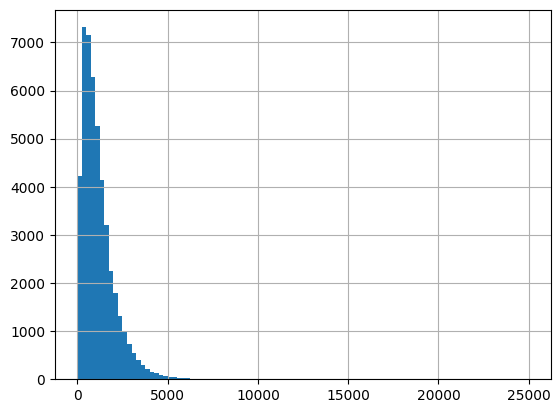

In [27]:
long_form_df['original_text'].str.len().hist(bins=100)

In [28]:
long_form_df['translated_text'].str.len().describe()

count    46848.000000
mean      2844.626964
std       2220.572158
min          8.000000
25%       1208.750000
50%       2255.000000
75%       3894.000000
max      21214.000000
Name: translated_text, dtype: float64

<Axes: >

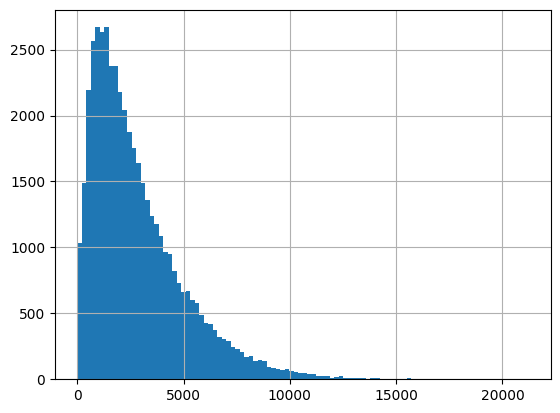

In [29]:
long_form_df['translated_text'].str.len().hist(bins=100)

In [30]:
len(long_form_df)

46848

In [31]:
original_text_max_length = 2_000
translated_text_max_length = 8_000
droping_query = ((long_form_df['original_text'].str.len() <= original_text_max_length)
                 & (long_form_df['translated_text'].str.len() <= translated_text_max_length))
long_form_df = long_form_df[droping_query]

print(f'Removed Fraction: {1 - droping_query.mean()}')

long_form_df

Removed Fraction: 0.15292008196721307


,king,year,month,entry_order_grouped,original_text,translated_text
0,경종,1720.0,10월,0.0,"○朔甲午/夜電。 ○以兪拓基爲吏曹佐郞。 ○行都堂錄, 選李箕鎭、申晳、申昉、金鎭商、李重協...",밤에 번개가 쳤다. 유척기(兪拓基)를 이조 좌랑(吏曹佐郞)으로 삼았다. (도당록(都...
1,경종,1720.0,10월,1.0,"○承旨柳重茂、李正臣等, 以雷變陳戒, 略曰:\n近日朝廷之上, 黨議橫流, 用舍之際, 偏...",승지(承旨) 유중무(柳重茂)·이정신(李正臣) 등이 천둥의 변괴 때문에 진계(陳戒)하...
2,경종,1720.0,10월,2.0,"○癸卯/副校理申昉, 箚斥趙最壽。 略曰:\n泮儒被竄, 旋卽反汗, 凡在瞻聆, 孰不仰殿下...","부교리(副校理) 신방(申昉)이 차자를 올려 조최수(趙最壽)를 배척하였는데, 대략 이..."
3,경종,1720.0,10월,3.0,"○壬子/上親行啓殯奠、啓攅宮祭、祖奠。 ○癸丑/大行大王發引。 上陪至慕華館, 哭辭還, 御...",임금이 몸소 계빈전(啓殯奠)과 계찬 궁제(啓攢宮祭)와 조전(祖奠)을 거행하였다. 대...
4,경종,1720.0,10월,4.0,"○右議政趙泰耉上疏, 申懇還納命召, 上遣承旨敦諭。 ○庚申/以趙尙絅爲司諫, 金龍慶爲正言...",우의정(右議政) 조태구(趙泰耉)가 소를 올려 명소(命召)를 도로 거둘 것을 거듭 간...
...,...,...,...,...,...,...
46843,효종,1659.0,윤3월,6.0,"○辛巳/太白晝見。 ○白翎島饑移粟賑之。 ○兵曹判書宋浚吉以病乞免, 許之。 ○壬午/太白晝...",태백성이 낮에 나타났다. 백령도(白翎島)에 기근이 들었으므로 곡식을 이송하여 진구하...
46844,효종,1659.0,윤3월,7.0,"○癸未/兵曹判書洪命夏上疏辭職, 答曰: ""噫! 今日之國事, 將若之何? 大臣不安, 鼎席...","병조 판서 홍명하가 상소하여 사직하니, 답하였다.\n""아, 오늘날 국사를 장차 어떻..."
46845,효종,1659.0,윤3월,8.0,"○憲府啓曰: ""全南監司徐必遠啓請: ‘刑曹罪囚趙義智, 從其所訴, 納米贖刑, 以爲賑救之...","헌부가 아뢰기를,\n""전남 감사 서필원(徐必遠)이 계청하기를 ‘형조의 죄수 조의지(..."
46846,효종,1659.0,윤3월,9.0,"○命常平廳, 抄出京中鰥寡孤獨, 賜粟以賑之。 ○上召對玉堂講官, 講《心經》。 ○庚寅/上...","상평청에 명하여, 서울에 있는 홀아비·과부·고아·자식없는 노인을 초출(抄出)하여 곡..."


<Axes: >

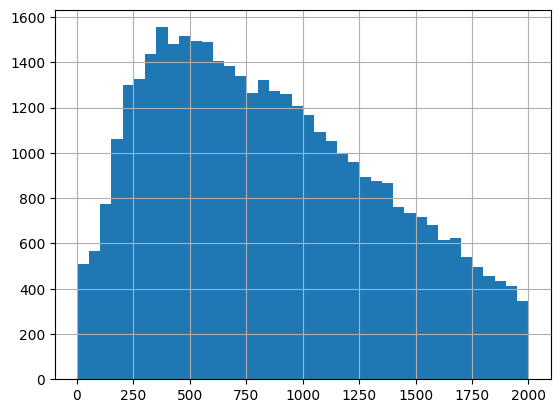

In [32]:
long_form_df['original_text'].str.len().hist(bins=40)

<Axes: >

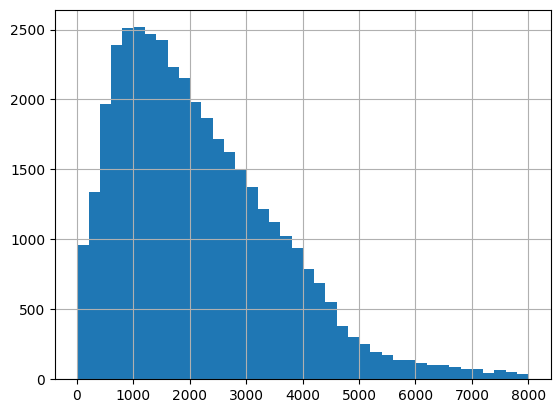

In [33]:
long_form_df['translated_text'].str.len().hist(bins=40)

In [ ]:
train_df, test_df = train_test_split(long_form_df, test_size=0.1, random_state=42, shuffle=True)

In [35]:
len(train_df), len(test_df)

(35715, 3969)

In [36]:
train_df.to_parquet('./data/train.parquet')

In [37]:
test_df.to_parquet('./data/test.parquet')